In [6]:
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import html
import re
from sklearn.feature_extraction.text import strip_accents_ascii, strip_accents_unicode
import matplotlib.pyplot as plt
import math

%matplotlib inline
numcores = 8
tiene_gpu = False
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 100)

In [7]:
df = dd.read_parquet('data/travcoding/Properties_clean.parquet')

In [8]:
def get_word_stats(ddf, colum_name):   
    df2 = ddf[colum_name].str.split().explode().value_counts().reset_index().rename(columns={'index': 'word',colum_name:'cantidad'})    
    df2['freq'] = (df2.cantidad/df2.cantidad.sum())
    df2['idf']  = (da.log(1/df2.freq))
    return df2


In [4]:
column_name = 'propertyname'
property_name_stats = get_word_stats(df, column_name).compute()   
property_name_stats.to_parquet('data/travcoding/property_name_stats.parquet')


# Plot Stats for StopWords

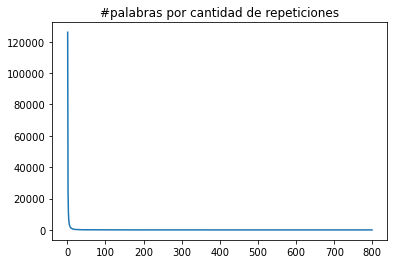

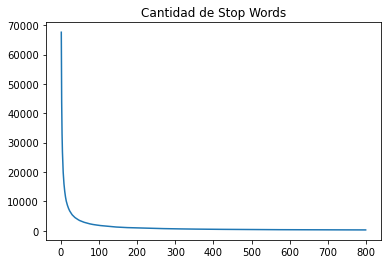

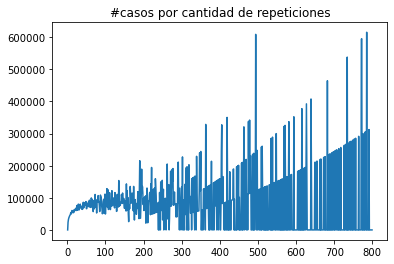

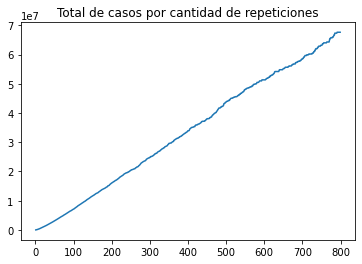

In [5]:

name_stats_cant = []
name_stats_value = []
cases = []

max_repetitiosns = 800
min_repetitiosns = 1


for i in range(min_repetitiosns,max_repetitiosns):
    value = property_name_stats[property_name_stats.cantidad == i].word.size
    name_stats_cant.append(i)  
    name_stats_value.append(value)
    cases.append(value * math.comb(i,2))


tot_cases = []
for i in range(min_repetitiosns,max_repetitiosns):
    tot_cases.append(sum(cases[:i]))
    
tot_stopwords = []
for i in range(min_repetitiosns,max_repetitiosns):
    value = property_name_stats[property_name_stats.cantidad > i].word.size
    tot_stopwords.append(value)


plt.plot(name_stats_cant, name_stats_value)
plt.title("#palabras por cantidad de repeticiones")
plt.show()

plt.plot(name_stats_cant, tot_stopwords)
plt.title("Cantidad de Stop Words")
plt.show()



plt.plot(name_stats_cant, cases)
plt.title("#casos por cantidad de repeticiones")
plt.show()

plt.plot(name_stats_cant, tot_cases)
plt.title("Total de casos por cantidad de repeticiones")
plt.show()



